# <span style='font-family:"Times New Roman"'> <span styel=''>**METRICS ANALYSIS**
*Emile Cohen*
    
 *April 2020*

**Goal:** In this notebook, we compute panels for specific metrics across all cancer types.

The notebook is composed of 2 parts:
   * **Subgroup Proportion**
   * **Number of aberrant chromosomes**
---

In [2]:
%run -i '../../../utils/setup_environment.ipy'

import warnings
warnings.filterwarnings('ignore')
from scipy.stats import fisher_exact, ranksums, chi2, norm
from statsmodels.sandbox.stats.multicomp import multipletests
import matplotlib.gridspec as gridspec

data_path = '../../../data/'

Setup environment... done!


<span style="color:green">✅ Working on **mskimpact_env** conda environment.</span>

In [4]:
cancer_type = 'Ovarian Cancer'
mc = list(islice(cycle(list(sns.color_palette("muted"))), None, 6))
palette ={'>=1_LOSS':mc[0], 'HOMDEL':mc[1], '1_WILD_TYPE':mc[2], '>1muts':mc[3], '>=1_cnLOH':mc[4], '0_HETLOSS':mc[5]}
palette_list = [mc[5],mc[2],mc[3],mc[4],mc[0],mc[1]]
group_list = ['0_HETLOSS', '1_WILD_TYPE', '>1muts', '>=1_cnLOH', '>=1_LOSS','HOMDEL']
master = load_clean_up_master(data_path + 'merged_data/master_file.pkl')
# We remove INDETERMINATE and NaN tp53_cn_state samples
master_cancer = master[master['Cancer_Type'] == cancer_type][master['tp53_cn_state'] != 'INDETERMINATE'][~master['tp53_cn_state'].isna()]

NameError: name 'islice' is not defined

---
# Subgroup Proportion

NameError: name 'master_cancer' is not defined

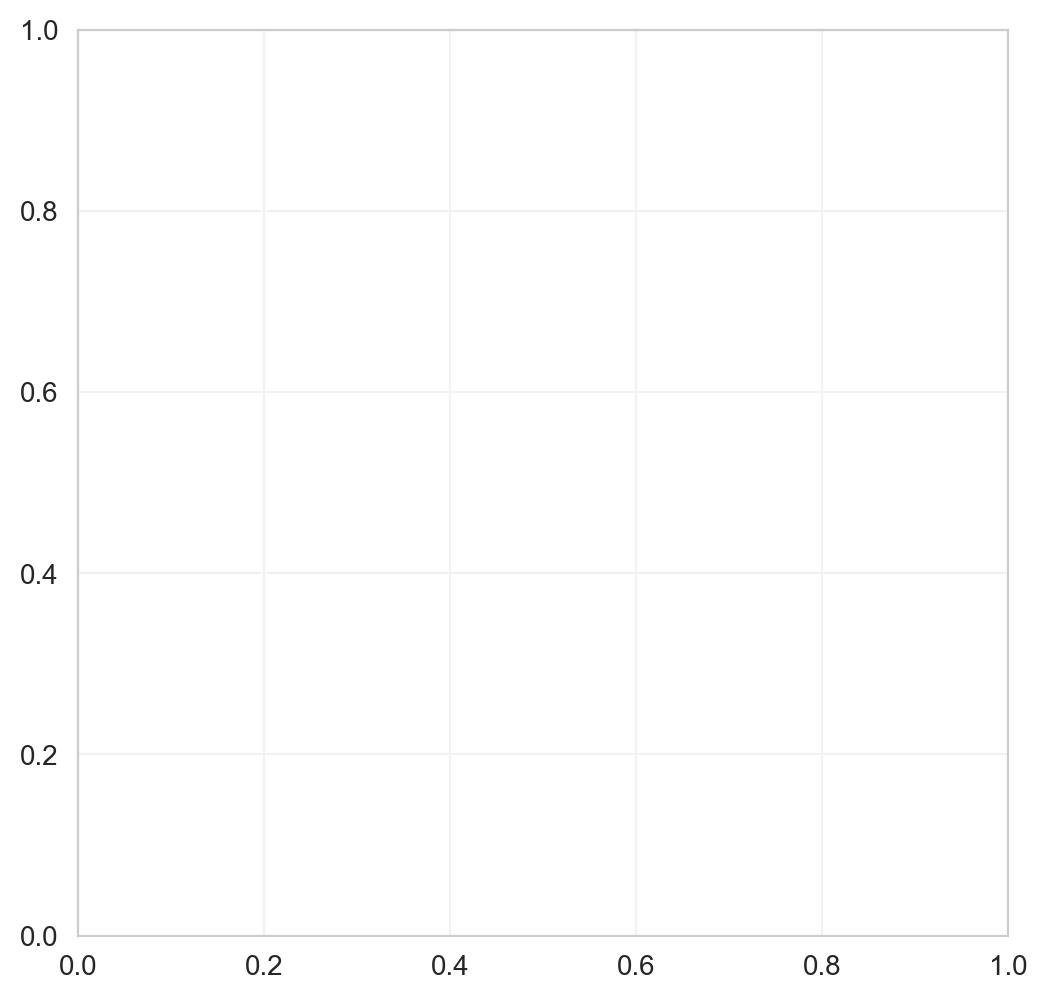

In [3]:
fig, ax = plt.subplots()
metrics='tp53_group'

count_prim = get_groupby(master_cancer[master_cancer['Sample_Type'] == 'Primary'], metrics, 'count_prim_' + metrics)
count_met = get_groupby(master_cancer[master_cancer['Sample_Type'] == 'Metastasis'], metrics, 'count_met_' + metrics)
freq_prim = pd.DataFrame(count_prim['count_prim_' + metrics]).sort_values(by=['count_prim_' + metrics], ascending=False)/ pd.DataFrame(count_prim['count_prim_' + metrics]).sum()
freq_met = pd.DataFrame(count_met['count_met_' + metrics]).sort_values(by=['count_met_' + metrics], ascending=False)/ pd.DataFrame(count_met['count_met_' + metrics]).sum()
freq_prim.columns=['P'] ; freq_met.columns=['M']
freq = pd.concat([freq_prim, freq_met], axis=1)
freq = freq.reindex(group_list)
display(freq)

freq.T.plot(kind = 'bar', stacked=True, figsize = (1,4), ax=ax, yticks=[0,0.25,0.5,0.75,1], color=palette_list)
ax.set_title('', weight = 'bold', fontsize=12)
ax.legend_.remove()
ax.xaxis.set_major_formatter(matplotlib.ticker.IndexFormatter([ 'P\n' + str(pd.DataFrame(count_prim['count_prim_' + metrics]).sum().values), 'M\n' + str(pd.DataFrame(count_met['count_met_' + metrics]).sum().values)]))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for container in ax.containers:
    for i, child in enumerate(container.get_children()):
        child.set_x(child.get_x() - 0.2)
        child.set_width(1)
        
for tick in ax.get_xticklabels():
    tick.set_rotation(0)

---
# Number of aberrant chromosomes